In [70]:
import os
import sys
#from stocker import Stocker
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
from matplotlib import style
from pandas import read_csv
from pandas.util.testing import assert_frame_equal
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%config IPCompleter.greedy=True

In [71]:
#By using DataReader we will get the stock quote from Yahoo Finance
df = web.DataReader('AMZN', data_source = 'yahoo', start = '2019-03-09', end = '2020-03-09')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-11,1672.290039,1626.010010,1626.119995,1670.619995,3876400,1670.619995
2019-03-12,1684.270020,1660.979980,1669.000000,1673.099976,3614500,1673.099976
2019-03-13,1700.000000,1679.349976,1683.000000,1690.810059,3552000,1690.810059
2019-03-14,1702.000000,1684.339966,1691.199951,1686.219971,2946600,1686.219971
2019-03-15,1718.800049,1693.130005,1703.000000,1712.359985,7550900,1712.359985
...,...,...,...,...,...,...
2020-03-03,1996.329956,1888.089966,1975.369995,1908.989990,7534500,1908.989990
2020-03-04,1978.000000,1922.000000,1946.569946,1975.829956,4772900,1975.829956
2020-03-05,1960.719971,1910.000000,1933.000000,1924.030029,4748200,1924.030029


In [72]:
#Get the number of rows and columns in the data set
df.shape

(252, 6)

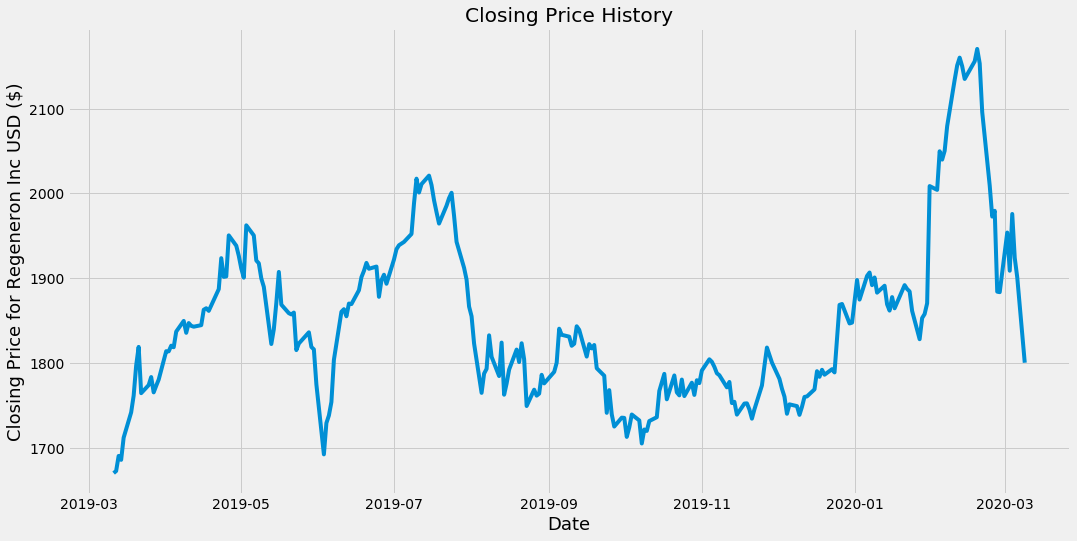

In [73]:
#Visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price for Regeneron Inc USD ($)', fontsize=18)
plt.show()

In [74]:
#Create a new dataframe with only the "Close" column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

202

In [75]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00496393],
       [0.04041246],
       [0.03122493],
       [0.08354682],
       [0.14317461],
       [0.18260605],
       [0.25350286],
       [0.29751806],
       [0.18845082],
       [0.207446  ],
       [0.22646121],
       [0.19031217],
       [0.20576472],
       [0.22043637],
       [0.2873698 ],
       [0.28694954],
       [0.30040025],
       [0.29671737],
       [0.33358695],
       [0.35876701],
       [0.33070452],
       [0.3537029 ],
       [0.34717766],
       [0.34515627],
       [0.34877904],
       [0.38514823],
       [0.38871089],
       [0.38244587],
       [0.43372713],
       [0.50670544],
       [0.46263014],
       [0.46363094],
       [0.56046842],
       [0.53604898],
       [0.51220984],
       [0.48218582],
       [0.46076854],
       [0.58414728],
       [0.56030838],
       [0.50116096],
       [0.49469583],
       [0.45886712],
       [0.43907125],
       [0.30436362],
       [0.33927143],
       [0.40138118],
       [0.474

In [76]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x train and y train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i, 0])
    if i<=60: 
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00496393, 0.04041246, 0.03122493, 0.08354682,
       0.14317461, 0.18260605, 0.25350286, 0.29751806, 0.18845082,
       0.207446  , 0.22646121, 0.19031217, 0.20576472, 0.22043637,
       0.2873698 , 0.28694954, 0.30040025, 0.29671737, 0.33358695,
       0.35876701, 0.33070452, 0.3537029 , 0.34717766, 0.34515627,
       0.34877904, 0.38514823, 0.38871089, 0.38244587, 0.43372713,
       0.50670544, 0.46263014, 0.46363094, 0.56046842, 0.53604898,
       0.51220984, 0.48218582, 0.46076854, 0.58414728, 0.56030838,
       0.50116096, 0.49469583, 0.45886712, 0.43907125, 0.30436362,
       0.33927143, 0.40138118, 0.47427935, 0.39707769, 0.37700157,
       0.37409935, 0.37842287, 0.28995195, 0.30556453, 0.33188564,
       0.29737781, 0.29163322, 0.20906717, 0.04417523, 0.11797451])]
[0.1358687113689343]



In [77]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [78]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(142, 60, 1)

In [79]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [80]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(142, 60, 1)

In [81]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [82]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [83]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

Epoch 1/1
142/142 [==============================] - 15s 104ms/step - loss: 0.0183


In [84]:
#Create the testing data set
#Create a new array containing scaled vals from index 1543 to 2020
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [85]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [86]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [87]:
#Get the models predicted price values
predictions = model.predict(x_test)
prediction = scaler.inverse_transform(predictions)

In [88]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

1953.9609874296189

C:\Users\rony1\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


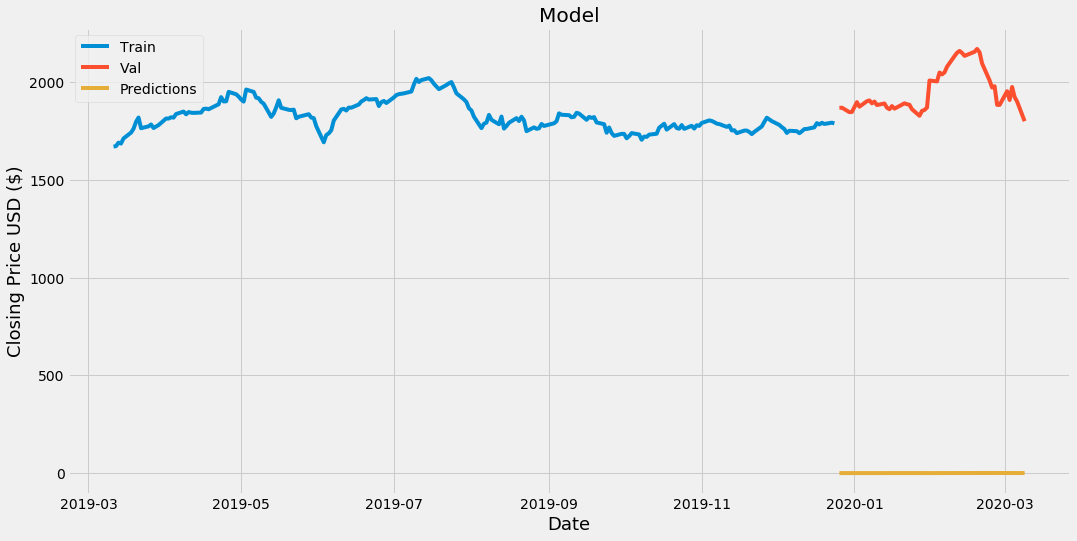

In [89]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [90]:
#showing the prediction we did and actual closing price 
valid

,Close,Predictions
Date,,
2019-12-26,1868.770020,0.273996
2019-12-27,1869.800049,0.285832
2019-12-30,1846.890015,0.301201
2019-12-31,1847.839966,0.315584
2020-01-02,1898.010010,0.328683
2020-01-03,1874.969971,0.345130
2020-01-06,1902.880005,0.360215
2020-01-07,1906.859985,0.376387
2020-01-08,1891.969971,0.392540


In [91]:
pwd


'C:\\Users\\rony1'

In [92]:
cd C:\Users\rony1\Documents\New folder

C:\Users\rony1\Documents\New folder


In [93]:
Apple_df = pd.read_csv('AAPL.csv')
Amazon_df = pd.read_csv('AMZN.csv')
Google_df = pd.read_csv('GOOG.csv')
Microsoft_df = pd.read_csv('MSFT.csv')
Facebook_df = pd.read_csv('FB.csv')

In [94]:
#Using Linear Regression for Apple

forecast_time = int(15) # write number of predicitons that you want to make e.g 5,10,15 etc.
#Repalce Apple_df with dataframe of your desired company whose prediciton you want to make e.g Amazon_df, Google_df etc.
LR_df=Apple_df[['Open','High','Low','Close','Adj Close','Volume']].copy()  # 
#LR_df=Apple_df.iloc[:,1:].copy()

#Replace close with the column that you want to predict
LR_df['prediction'] = LR_df['High'].shift(-1)
LR_df.dropna(inplace=True)
X1 = np.array(LR_df.drop(['prediction'], 1))
Y1 = np.array(LR_df['prediction'])
X2 = preprocessing.scale(X1)
X_prediction = X2[-forecast_time:]
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y1, test_size=1)
clf = LinearRegression()
clf.fit(X_train, Y_train)
prediction = (clf.predict(X_prediction))

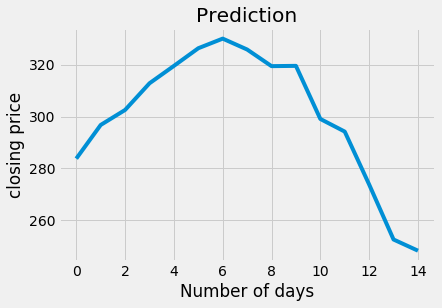

In [95]:
plt.title("Prediction")
plt.xlabel("Number of days")

#Replace * with the column that you want to predict
plt.ylabel("closing price");
plt.plot(prediction)
plt.show()

In [96]:
#we need to create the dataset of x and y which is the two data set we going to take to predict the model
#so we have to take the date and we taking the "Close" cloumn
dates = []
prices = []
Apple_df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
22,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100


In [97]:
for pred in prediction:
    print(pred)

283.77300746471127
296.7562410250105
302.5508900974058
312.8402081538393
319.55023755910065
326.3636828766744
330.0731169685554
325.87501615734914
319.456515707776
319.5605457074621
299.0767901847513
294.1986682262101
273.7883373477575
252.56072147431948
248.2450457706944
